In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "standard"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipUrls = []

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["url"] not in skipUrls
        if x["date"] >= startDate
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

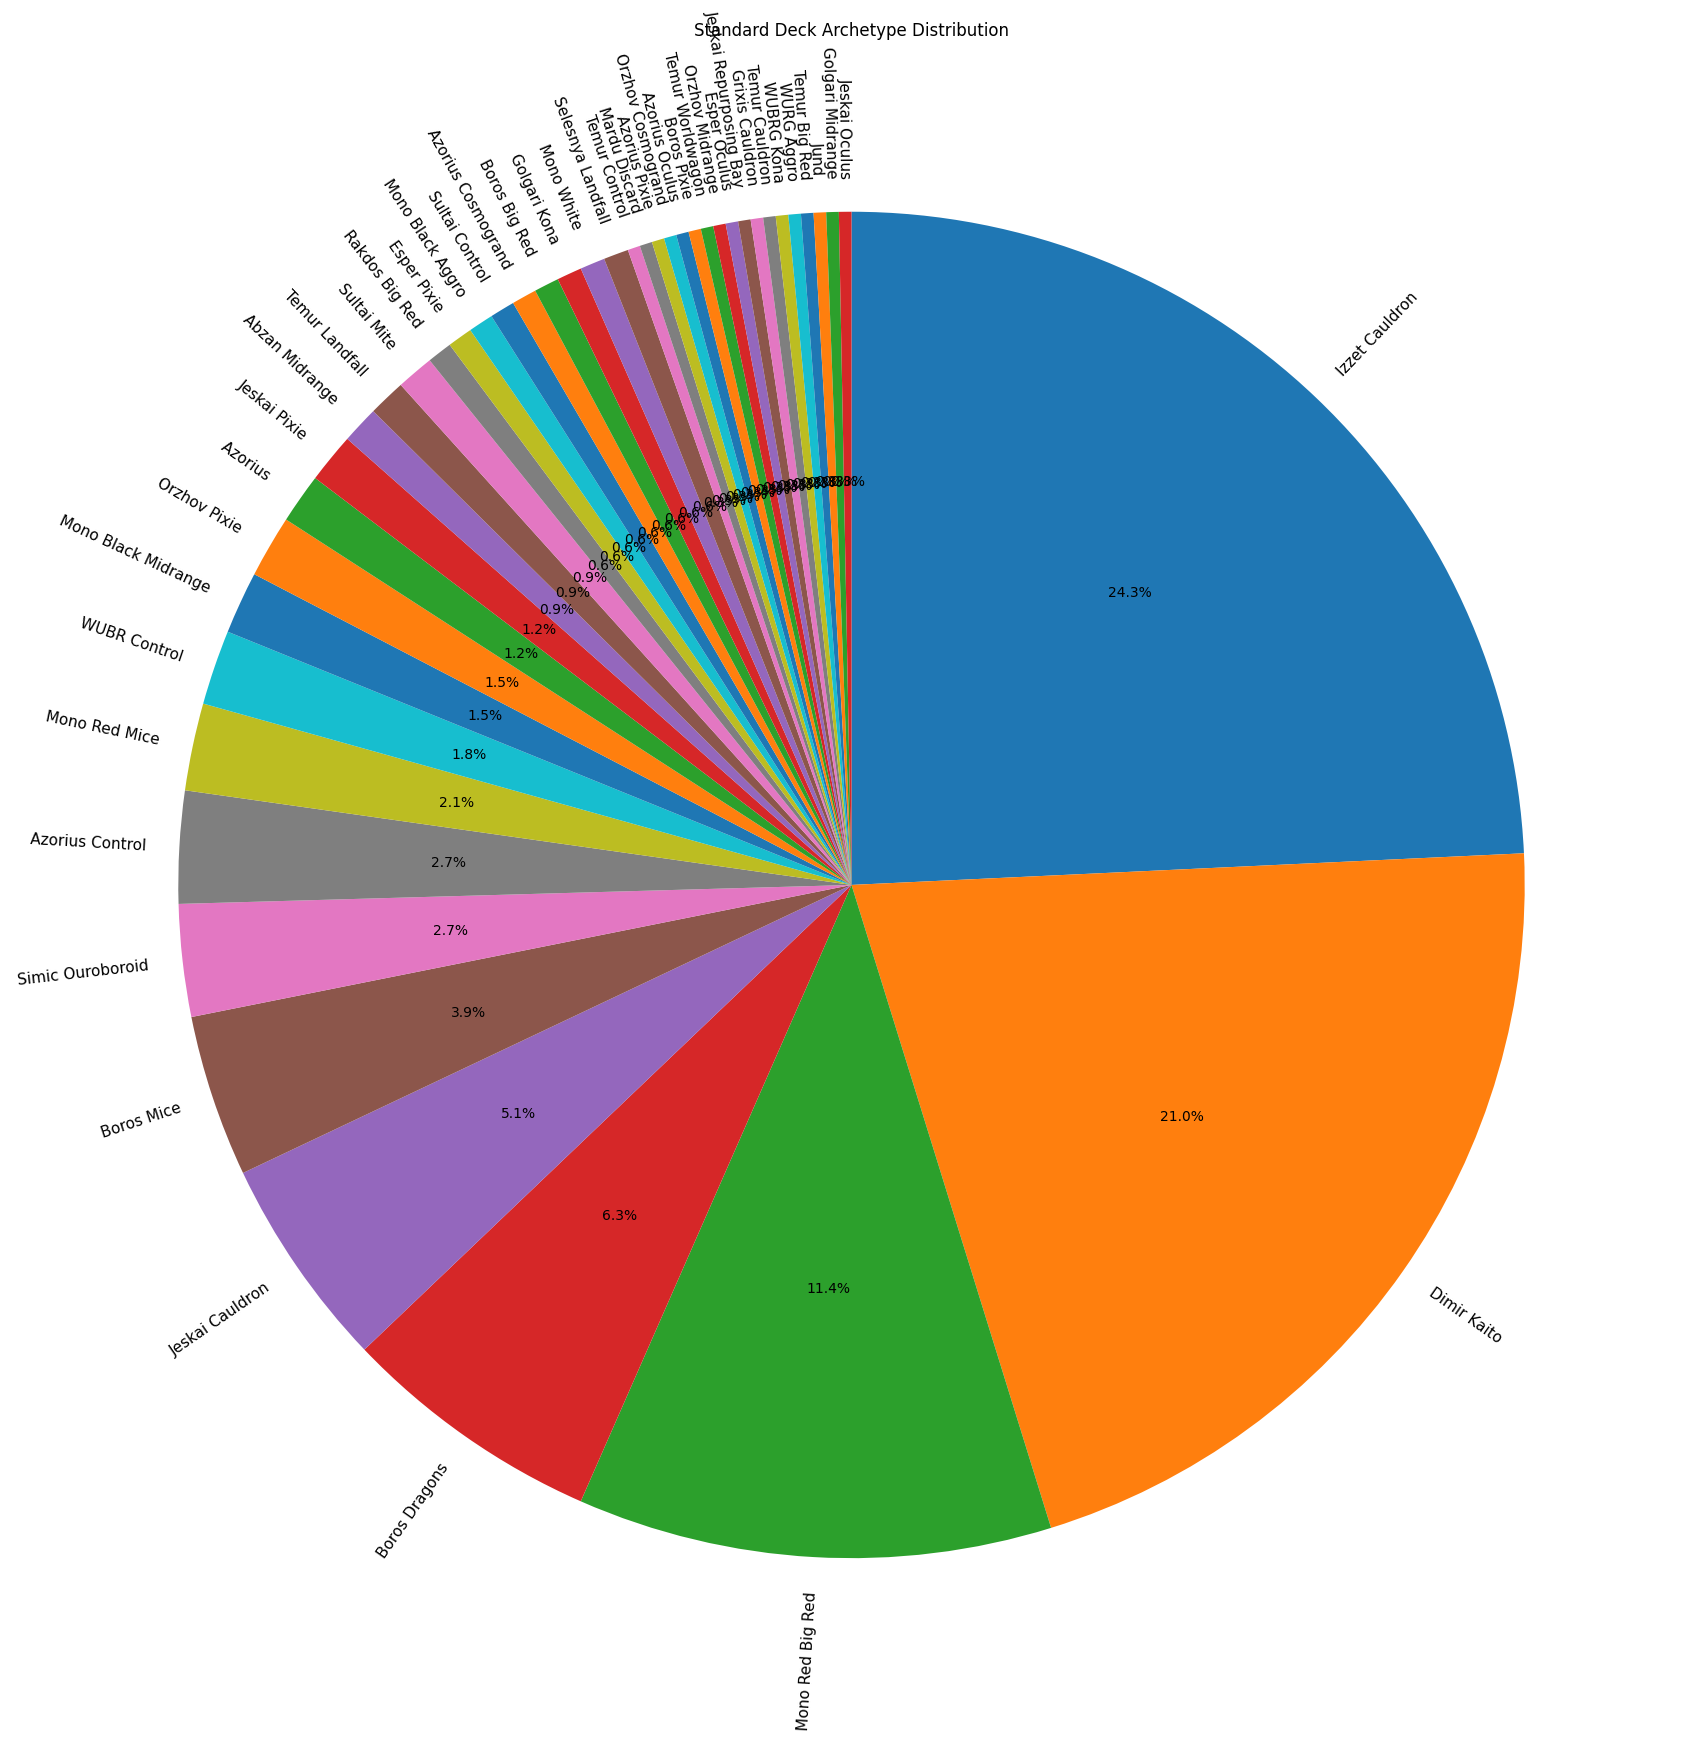

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

10 deck(s) without any of the specified key cards
Mono Black Aggro


Main/Side  \
Deck URL                                           Deck               
/decklist/standard-challenge-32-2025-08-2912812773 Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Main   
                                                   Deck 9      Main   
                                                   Deck 9      Side   
                                                   Deck 9      Side   
                                                   Deck 9      Main   
                                                   Deck 9      Side   

                                                                          Card Name  \
Deck URL                                           Deck                               
/decklist/standard-challenge-32-2025-08-2912812773 Deck 9  Dark Knight's Greatsword   
                                                   Deck 9           Deep-Cavern Bat   
                                                   Deck 9         Faerie Dreamthief   
                                                   Deck 9     Gatekeeper of Malakir   
                                                   Deck 9            Forsaken Miner   
                                                   Deck 9        Strategic Betrayal   
                                                   Deck 9           Timeline Culler   
                                                   Deck 9   Thought-Stalker Warlock   
                                                   Deck 9            Nowhere to Run   
                                                   Deck 9             Defiled Crypt   
                                                   Deck 9            Feed the Cycle   
                                                   Deck 9              Long Goodbye   
                                                   Deck 9      Intimidation Tactics   
                                                   Deck 9           Final Vengeance   
                                                   Deck 9        Snarling Gorehound   
                                                   Deck 9         Shoot the Sheriff   

                                                           Quantity mana_cost  \
Deck URL                                           Deck                         
/decklist/standard-challenge-32-2025-08-2912812773 Deck 9         4    {2}{B}   
                                                   Deck 9         4    {1}{B}   
                                                   Deck 9         4       {B}   
                                                   Deck 9         4    {B}{B}   
                                                   Deck 9         4       {B}   
                                                   Deck 9         4    {1}{B}   
                                                   Deck 9         4    {B}{B}   
                                                   Deck 9         4    {2}{B}   
                                                   Deck 9         4    {1}{B}   
                                                   Deck 9         4    {3}{B}   
                                                   Deck 9         3    {1}{B}   
                                                   Deck 9         3    {1}{B}   
                                                   Deck 9         3       {B} 

In [4]:
"""
includedCardList = ["Vivi Ornitier"]
excludedCardList = ["Agatha's Soul Cauldron"]
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)
"""

'\nincludedCardList = ["Vivi Ornitier"]\nexcludedCardList = ["Agatha\'s Soul Cauldron"]\nQueries.avgDecksWithCard(\n    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"\n)\n'

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Mountain                 1699
Island                    993
Swamp                     578
Soulstone Sanctuary       575
Riverpyre Verge           538
                         ... 
The Fire Crystal            1
Thousand Moons Smithy       1
The Irencrag                1
Bramble Familiar            1
Bottomless Pool             1
Name: Quantity, Length: 368, dtype: int64

In [6]:
Queries.avgArchetype(deckList, "Izzet Cauldron", "Main")

Main/Side  \
Deck URL                                           Deck                
/decklist/standard-challenge-32-2025-08-2812812749 Deck 11      Main   
                                                   Deck 11      Main   
                                                   Deck 11      Main   
                                                   Deck 11      Main   
                                                   Deck 11      Main   
...                                                              ...   
/decklist/standard-league-2025-09-029495           Deck 2       Main   
                                                   Deck 2       Main   
                                                   Deck 2       Main   
                                                   Deck 2       Main   
                                                   Deck 2       Main   

                                                                         Card Name  \
Deck URL                                           Deck                              
/decklist/standard-challenge-32-2025-08-2812812749 Deck 11  Agatha's Soul Cauldron   
                                                   Deck 11     Fear of Missing Out   
                                                   Deck 11                  Island   
                                                   Deck 11      Into the Flood Maw   
                                                   Deck 11                Mountain   
...                                                                            ...   
/decklist/standard-league-2025-09-029495           Deck 2                   Abrade   
                                                   Deck 2         Thundering Falls   
                                                   Deck 2      Soulstone Sanctuary   
                                                   Deck 2                Wild Ride   
                                                   Deck 2       Tersa Lightshatter   

                                                            Quantity  \
Deck URL                                           Deck                
/decklist/standard-challenge-32-2025-08-2812812749 Deck 11         4   
                                                   Deck 11         4   
                                                   Deck 11         4   
                                                   Deck 11         4   
                                                   Deck 11         4   
...                                                              ...   
/decklist/standard-league-2025-09-029495           Deck 2          2   
                                                   Deck 2          2   
                                                   Deck 2          1   
                                                   Deck 2          1   
                                                   Deck 2          1   

                                                           mana_cost  \
Deck URL                                           Deck                
/decklist/standard-challenge-32-2025-08-2812812749 Deck 11       {2}   
                                                   Deck 11    {1}{R}   
                                                   Deck 11             
                                                   Deck 11       {U}   
                                                   Deck 11             
...                                                              ...   
/decklist/standard-league-2025-09-029495           Deck 2     {1}{R}   
                                                   Deck 2              
                                                   Deck 2              
                                                   Deck 2        {R}   
                                                   Deck 2     {2}{R}   

                                                                                   type_line  \
Deck URL                         

In [7]:
[deck.deckId
for deck in deckList
if "Vivi Ornitier" in deck.uniqueCards['Main']
if "Agatha's Soul Cauldron" not in deck.uniqueCards['Main']
]

[]